## ☎️ Projeto Aprendizagem de Máquina - Código do relatório 5 (Modeling)

### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 📚 Importando as bibliotecas necessárias

In [ ]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=477f52e31c2b92179f8e6a2998dc11b5c5d541e79dde21914f0e0e7025a2ba57
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing
import warnings
import arff


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, PredefinedSplit
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 10, 8

warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [ ]:
with open('/content/drive/MyDrive/Projetos Aprendizagem de Máquina/Terceiro Projeto/1. Dados/pol.arff', 'r') as file:
    data = arff.load(file)

df = pd.DataFrame(data['data'])

df.columns = [attr[0] for attr in data['attributes']]

In [ ]:
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,binaryClass
0,110.0,100.0,100.0,100.0,60.0,108.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
1,110.0,100.0,100.0,100.0,130.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
2,110.0,100.0,100.0,100.0,110.0,89.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
3,110.0,100.0,100.0,100.0,13.0,126.0,89.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
4,110.0,100.0,100.0,100.0,15.0,119.0,78.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
5,110.0,100.0,100.0,100.0,50.0,113.0,100.0,143.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
6,110.0,100.0,100.0,100.0,117.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
7,110.0,100.0,100.0,100.0,81.0,110.0,77.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
8,110.0,100.0,100.0,100.0,44.0,96.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
9,110.0,100.0,100.0,100.0,66.0,80.0,95.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


### Preparação dos dados

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Função para remover outliers usando Z-score
def remover_outliers_zscore(df, threshold=3):
    df_clean = df.copy()
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        z_scores = stats.zscore(df[col])
        abs_z_scores = abs(z_scores)
        mask = abs_z_scores > threshold
        df_clean = df_clean[~mask]
    return df_clean

# Função para remover colunas constantes
def remover_colunas_constantes(df):
    nunique = df.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    return df.drop(cols_to_drop, axis=1), cols_to_drop

# Alterar o target de P e N para 1 e 0
df['binaryClass'] = df['binaryClass'].map({'P': 1, 'N': 0})

# Dividir o DataFrame em treino, teste e validação
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['binaryClass'])
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['binaryClass'])

# Aplicar a remoção de outliers no conjunto de treino
cleaned_train_df = remover_outliers_zscore(train_df)

# Remover colunas constantes no conjunto de treino
cleaned_train_df, cols_to_drop = remover_colunas_constantes(cleaned_train_df)

# Remover linhas duplicadas no conjunto de treino
cleaned_train_df = cleaned_train_df.drop_duplicates()

# Normalizar os dados no conjunto de treino
scaler = MinMaxScaler()
train_features = cleaned_train_df.drop(columns=['binaryClass'])
train_target = cleaned_train_df['binaryClass']
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)
cleaned_train_df_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
cleaned_train_df_scaled['binaryClass'] = train_target.values

# Balanceamento dos dados no conjunto de treino usando SMOTE
smote = SMOTE(random_state=42)
train_features_balanced, train_target_balanced = smote.fit_resample(cleaned_train_df_scaled.drop(columns=['binaryClass']), cleaned_train_df_scaled['binaryClass'])
cleaned_train_df_balanced = pd.DataFrame(train_features_balanced, columns=cleaned_train_df_scaled.drop(columns=['binaryClass']).columns)
cleaned_train_df_balanced['binaryClass'] = train_target_balanced.values

# Separar os dados do conjunto de treino
train_features = cleaned_train_df_balanced.drop(columns=['binaryClass'])
train_target = cleaned_train_df_balanced['binaryClass']

# Remover as mesmas colunas do conjunto de validação
val_df_clean = val_df.drop(columns=cols_to_drop)

# Remover as mesmas colunas do conjunto de teste
test_df_clean = test_df.drop(columns=cols_to_drop)

# Normalizar os dados no conjunto de validação
val_features = val_df_clean.drop(columns=['binaryClass'])
val_target = val_df_clean['binaryClass']
val_features_scaled = scaler.transform(val_features)

# Separar os dados do conjunto de teste
test_features = test_df_clean.drop(columns=['binaryClass'])
test_target = test_df_clean['binaryClass']
test_features_scaled = scaler.transform(test_features)

### Modelagem

#### 1. K-NN (K-Nearest Neighbors)

##### Baseline

In [ ]:
knn_baseline = KNeighborsClassifier()

# Usar cross-validation para treinar e validar o modelo
cv_scores = cross_val_score(knn_baseline, train_features, train_target, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# Ajustar o modelo aos dados de treino completos
knn_baseline.fit(train_features, train_target)

# Prever os resultados no conjunto de validação
val_predictions_baseline = knn_baseline.predict(val_features_scaled)

# Prever os resultados no conjunto de teste
test_predictions_baseline = knn_baseline.predict(test_features_scaled)

# Imprimir o classification report da versão baseline
print("\nClassification Report [Validação] - Baseline KNN:")
print(classification_report(val_target, val_predictions_baseline))
print("Classification Report [Teste] - Baseline KNN:")
print(classification_report(test_target, test_predictions_baseline))

Cross-validation scores: [0.93514329 0.93509434 0.94415094 0.94641509 0.94566038]
Mean cross-validation score: 0.9412928085602893

Classification Report [Validação] - Baseline KNN:
              precision    recall  f1-score   support

           0       0.68      0.96      0.80       756
           1       0.98      0.78      0.86      1494

    accuracy                           0.84      2250
   macro avg       0.83      0.87      0.83      2250
weighted avg       0.88      0.84      0.84      2250

Classification Report [Teste] - Baseline KNN:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       756
           1       0.98      0.78      0.87      1494

    accuracy                           0.85      2250
   macro avg       0.84      0.88      0.84      2250
weighted avg       0.88      0.85      0.85      2250



##### Otimizado com Randomized Search

Melhores parâmetros encontrados:
{'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}
Classification Report - Best KNN (Validation Set):
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       756
           1       0.98      0.76      0.85      1494

    accuracy                           0.83      2250
   macro avg       0.82      0.86      0.82      2250
weighted avg       0.87      0.83      0.83      2250


Classification Report - Best KNN (Test Set):
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       756
           1       0.98      0.78      0.87      1494

    accuracy                           0.84      2250
   macro avg       0.83      0.87      0.84      2250
weighted avg       0.88      0.84      0.85      2250



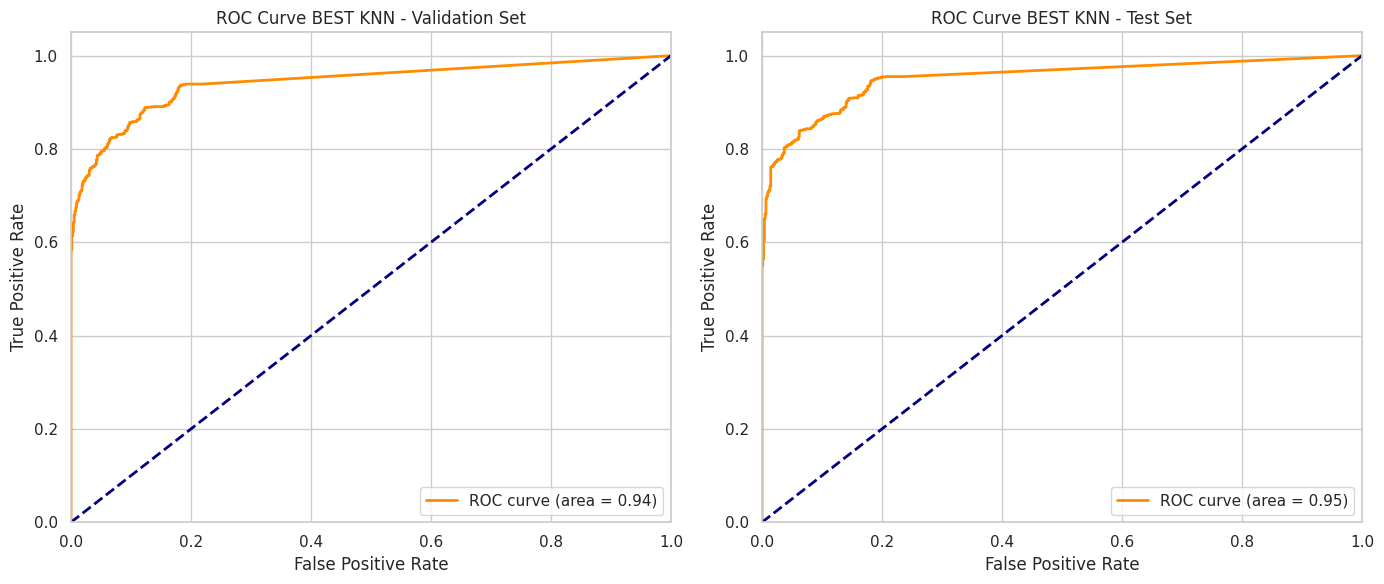

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, auc

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurar o RandomizedSearchCV
random_search_knn = RandomizedSearchCV(knn_baseline, param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de treino
random_search_knn.fit(train_features, train_target)

# Melhor modelo encontrado
best_knn = random_search_knn.best_estimator_

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(random_search_knn.best_params_)

# Prever os resultados com o melhor modelo no conjunto de validação
val_predictions_best = best_knn.predict(val_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de validação
print("Classification Report - Best KNN (Validation Set):")
print(classification_report(val_target, val_predictions_best))

# Prever as probabilidades no conjunto de validação
val_proba = best_knn.predict_proba(val_features_scaled)[:, 1]
val_fpr, val_tpr, _ = roc_curve(val_target, val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

# Prever os resultados com o melhor modelo no conjunto de teste
test_predictions_best = best_knn.predict(test_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de teste
print("\nClassification Report - Best KNN (Test Set):")
print(classification_report(test_target, test_predictions_best))

# Prever as probabilidades no conjunto de teste
test_proba = best_knn.predict_proba(test_features_scaled)[:, 1]
test_fpr, test_tpr, _ = roc_curve(test_target, test_proba)
test_roc_auc = auc(test_fpr, test_tpr)

# Plotar as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr, val_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST KNN - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST KNN - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 2. LVQ (Learning Vector Quantization)

##### Baseline

In [ ]:
def activation_func(f, x):
    dict = {
        'logsigmoid': logsigmoid,
        'purelin': purelin,
        'tanh': tanh,
        'compet': compet
            }
    if f in dict:
        return dict[f](x)
    else:
        print('Function does not exist')


def logsigmoid(x):
    return 1 / (1 + np.exp(-x))


def purelin(x):
    return x


def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))


def compet(x):
    max_val = np.max(x)
    res_arr = np.zeros_like(x)
    res_arr[x == max_val] = 1
    return res_arr


def derivative(f, x):
    match f:
        case 'logsigmoid':
            mat = logsigmoid(x) * (1 - logsigmoid(x))
            if x.shape[1] > 1:
                np.fill_diagonal(np.fliplr(mat), 0)
            return mat

        case 'purelin':
            mat = np.zeros(x.shape)
            return np.diag(np.ones(mat.shape[0]))

        case 'tanh':
            mat = 1 - (tanh(x) ** 2)
            if x.shape[0] > 1:
                np.fill_diagonal(np.fliplr(mat), 0)
            return mat


def distance(v):
    v = v.reshape(1, len(v))
    sum_squares = np.sum(np.square(v))

    return sum_squares**0.5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
np.random.seed(6202)

class LVQ(object):
    def __init__(self, alpha=0.01, epochs=20):
        self.alpha = alpha
        self.epochs = epochs
        # w2 = [[1, 0, 0], # need to uncomment this for iris dataset
        #       [0, 1, 0],
        #       [0, 0, 1]]
        w2 = [[1, 0],
              [0, 1]]

        self.w2 = np.array(w2)
        # for trying, I am taking just two neurons in the first layer
        # Tried different s1 values but s1=2 worked best for this problem

    def fit(self, X, y):
        print('LVQ RUNNING!')
        y = pd.Series(y)
        X = np.array(X)
        self.w1 = np.random.rand(self.w2.shape[0], len(X[0, :]))
        for epoch in range(self.epochs):
            # print('epoch = ', epoch+1)
            for i in range(len(X)):
                p_temp = np.array(X[i, :]).reshape(-1, 1)
                n1 = np.zeros((self.w1.shape[0]))
                for j in range(self.w1.shape[0]):
                    n1[j] = -np.linalg.norm(self.w1[j].reshape(-1, 1) - p_temp)
                a1 = activation_func('compet', n1)
                a2 = self.w2 @ a1.reshape(-1, 1)
                winner_neuron = np.argmax(a1)  # ref: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
                out = np.argmax(a2)
                if out == y.iloc[i]:
                    self.w1[winner_neuron] += self.alpha * (p_temp.ravel() - self.w1[winner_neuron])
                else:
                    self.w1[winner_neuron] -= self.alpha * (p_temp.ravel() - self.w1[winner_neuron])
                    k = len(n1)-1
                    while True:
                        a1 = np.zeros(n1.shape)
                        ele = n1.argsort()[k]  # ref: https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
                        a1[ele] = 1
                        a2 = self.w2 @ a1.reshape(-1, 1)
                        out = np.argmax(a2)
                        if out == y.iloc[i]:
                            self.w1[ele] += self.alpha * (p_temp.ravel() - self.w1[ele])
                            break
                        else:
                            k -= 1
        return self

    def predict(self, X):
        X = np.array(X)
        y_pred = []
        for i in range(len(X)):
            p_temp = np.array(X[i, :]).reshape(-1, 1)
            n1 = np.zeros((self.w1.shape[0]))
            for j in range(self.w1.shape[0]):
                n1[j] = -distance(self.w1[j].reshape(-1, 1) - p_temp)

            a1 = activation_func('compet', n1)
            a2 = self.w2 @ a1.reshape(-1, 1)
            out = np.argmax(a2)
            y_pred.append(out)

        y_pred = np.array(y_pred)

        return y_pred

    def predict_proba(self, X):
        X = np.array(X)
        y_proba = []
        for i in range(len(X)):
            p_temp = np.array(X[i, :]).reshape(-1, 1)
            n1 = np.zeros((self.w1.shape[0]))
            for j in range(self.w1.shape[0]):
                n1[j] = -distance(self.w1[j].reshape(-1, 1) - p_temp)
            a1 = activation_func('compet', n1)
            a2 = self.w2 @ a1.reshape(-1, 1)
            y_proba.append(a2.ravel())
        y_proba = np.array(y_proba)
        return y_proba

    def score(self, y_true, y_pred):
        return precision_score(y_true, y_pred)

LVQ RUNNING!
LVQ RUNNING!
LVQ RUNNING!
LVQ RUNNING!
LVQ RUNNING!
LVQ RUNNING!

Classification Report [Validação] - LVQ Final:
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       756
           1       0.90      0.77      0.83      1494

    accuracy                           0.79      2250
   macro avg       0.77      0.80      0.78      2250
weighted avg       0.81      0.79      0.79      2250

Classification Report [Teste] - LVQ Final:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       756
           1       0.91      0.78      0.84      1494

    accuracy                           0.80      2250
   macro avg       0.79      0.81      0.79      2250
weighted avg       0.83      0.80      0.81      2250



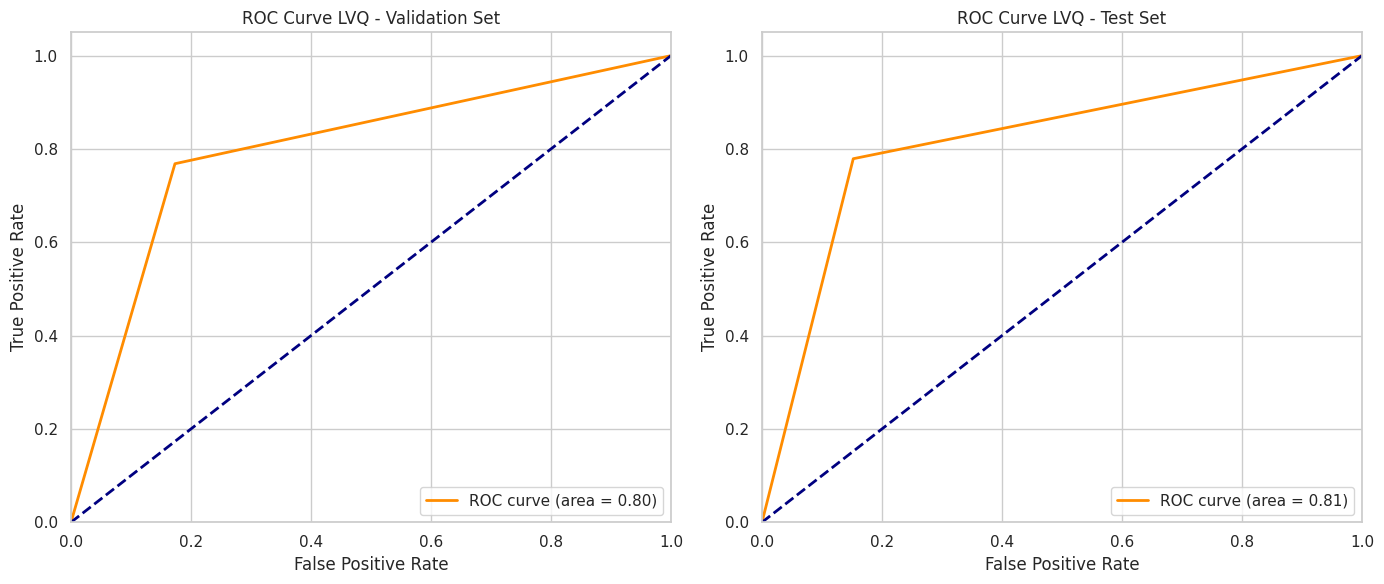

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configurar K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para armazenar previsões e verdadeiros valores durante a validação cruzada
cv_val_preds = []
cv_val_trues = []

for train_index, val_index in kf.split(train_features):
    X_train, X_val = train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_target.iloc[train_index], train_target.iloc[val_index]

    # Inicializar o modelo LVQ
    lvq_model = LVQ(alpha=0.01, epochs=20)

    # Ajustar o modelo
    lvq_model.fit(X_train, y_train)

    # Prever os resultados no conjunto de validação
    val_predictions = lvq_model.predict(X_val)

    # Armazenar previsões e verdadeiros valores
    cv_val_preds.extend(val_predictions)
    cv_val_trues.extend(y_val)

# Ajustar o modelo aos dados de treino completos
lvq_model_final = LVQ(alpha=0.01, epochs=20)
lvq_model_final.fit(train_features, train_target)

# Prever os resultados no conjunto de validação final
val_predictions_final = lvq_model_final.predict(val_features_scaled)

# Prever os resultados no conjunto de teste final
test_predictions_final = lvq_model_final.predict(test_features_scaled)

# Imprimir o classification report da versão final
print("\nClassification Report [Validação] - LVQ Final:")
print(classification_report(val_target, val_predictions_final))
print("Classification Report [Teste] - LVQ Final:")
print(classification_report(test_target, test_predictions_final))

# Prever as probabilidades para os conjuntos de validação e teste
# Nota: Se LVQ não retornar probabilidades, você pode usar os valores binários diretamente para ROC
val_proba = lvq_model_final.predict_proba(val_features_scaled)[:, 1]
test_proba = lvq_model_final.predict_proba(test_features_scaled)[:, 1]

# Calcular a curva ROC para o conjunto de validação
val_fpr, val_tpr, _ = roc_curve(val_target, val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

# Calcular a curva ROC para o conjunto de teste
test_fpr, test_tpr, _ = roc_curve(test_target, test_proba)
test_roc_auc = auc(test_fpr, test_tpr)

# Plotar as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr, val_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LVQ - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LVQ - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

##### Otimizado com Randomized Search

Melhores Parâmetros encontrados: {'epochs': 30, 'alpha': 0.062}

Best LVQ (Validation Set):
              precision    recall  f1-score   support

           0       0.36      0.17      0.23       756
           1       0.67      0.85      0.75      1494

    accuracy                           0.62      2250
   macro avg       0.52      0.51      0.49      2250
weighted avg       0.57      0.62      0.58      2250

Best LVQ (Test Set):
              precision    recall  f1-score   support

           0       0.45      0.21      0.29       756
           1       0.69      0.87      0.77      1494

    accuracy                           0.65      2250
   macro avg       0.57      0.54      0.53      2250
weighted avg       0.61      0.65      0.61      2250



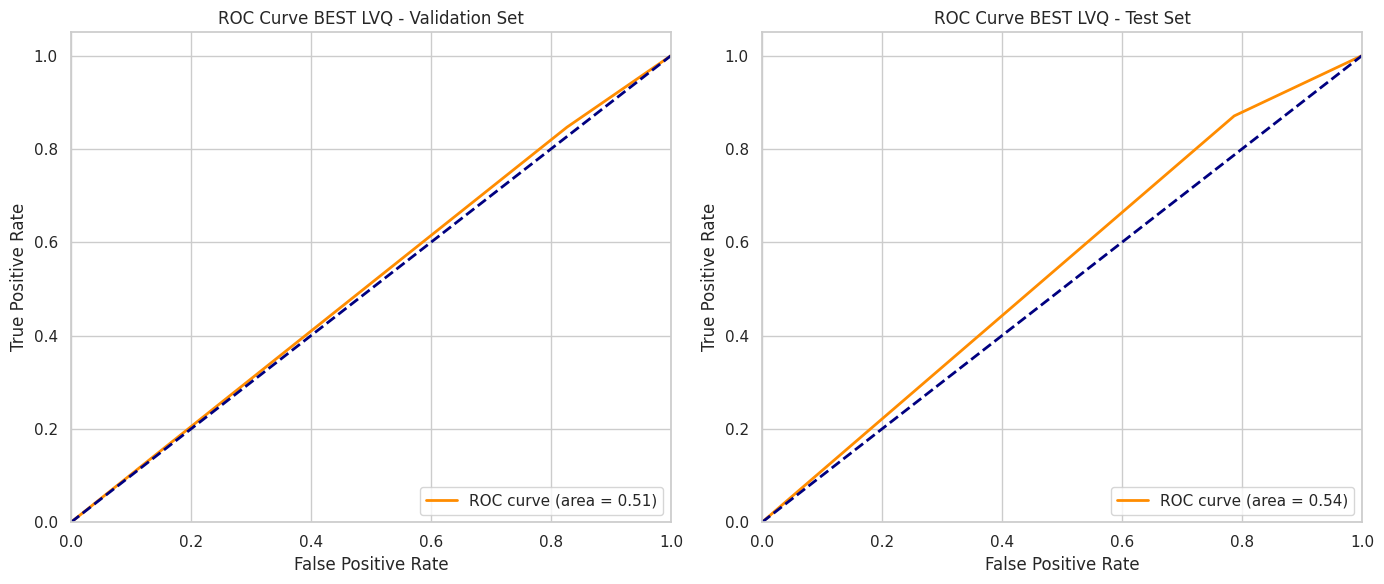

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, precision_score

# Definindo o modelo LVQ como uma classe que herda de BaseEstimator e ClassifierMixin
class LVQ(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=0.01, epochs=20):
        self.alpha = alpha
        self.epochs = epochs
        self.w2 = np.array([[1, 0], [0, 1]])

    def fit(self, X, y):
        y = pd.Series(y)
        X = np.array(X)
        self.w1 = np.random.rand(self.w2.shape[0], len(X[0, :]))
        for epoch in range(self.epochs):
            for i in range(len(X)):
                p_temp = np.array(X[i, :]).reshape(-1, 1)
                n1 = np.zeros((self.w1.shape[0]))
                for j in range(self.w1.shape[0]):
                    n1[j] = -np.linalg.norm(self.w1[j].reshape(-1, 1) - p_temp)
                a1 = self.activation_func('compet', n1)
                a2 = self.w2 @ a1.reshape(-1, 1)
                winner_neuron = np.argmax(a1)
                out = np.argmax(a2)
                if out == y.iloc[i]:
                    self.w1[winner_neuron] += self.alpha * (p_temp.ravel() - self.w1[winner_neuron])
                else:
                    self.w1[winner_neuron] -= self.alpha * (p_temp.ravel() - self.w1[winner_neuron])
                    k = len(n1) - 1
                    while True:
                        a1 = np.zeros(n1.shape)
                        ele = n1.argsort()[k]
                        a1[ele] = 1
                        a2 = self.w2 @ a1.reshape(-1, 1)
                        out = np.argmax(a2)
                        if out == y.iloc[i]:
                            self.w1[ele] += self.alpha * (p_temp.ravel() - self.w1[ele])
                            break
                        else:
                            k -= 1
        return self

    def predict(self, X):
        X = np.array(X)
        y_pred = []
        for i in range(len(X)):
            p_temp = np.array(X[i, :]).reshape(-1, 1)
            n1 = np.zeros((self.w1.shape[0]))
            for j in range(self.w1.shape[0]):
                n1[j] = -self.distance(self.w1[j].reshape(-1, 1) - p_temp)
            a1 = self.activation_func('compet', n1)
            a2 = self.w2 @ a1.reshape(-1, 1)
            out = np.argmax(a2)
            y_pred.append(out)
        y_pred = np.array(y_pred)
        return y_pred

    def predict_proba(self, X):
        X = np.array(X)
        y_proba = []
        for i in range(len(X)):
            p_temp = np.array(X[i, :]).reshape(-1, 1)
            n1 = np.zeros((self.w1.shape[0]))
            for j in range(self.w1.shape[0]):
                n1[j] = -self.distance(self.w1[j].reshape(-1, 1) - p_temp)
            a1 = self.activation_func('compet', n1)
            a2 = self.w2 @ a1.reshape(-1, 1)
            y_proba.append(a2.ravel())
        y_proba = np.array(y_proba)
        return y_proba

    def score(self, X, y):
        y_pred = self.predict(X)
        return precision_score(y, y_pred)

    def activation_func(self, f, x):
        functions = {
            'logsigmoid': self.logsigmoid,
            'purelin': self.purelin,
            'tanh': self.tanh,
            'compet': self.compet
        }
        return functions[f](x)

    def logsigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def purelin(self, x):
        return x

    def tanh(self, x):
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def compet(self, x):
        max_val = np.max(x)
        res_arr = np.zeros_like(x)
        res_arr[x == max_val] = 1
        return res_arr

    def distance(self, v):
        return np.linalg.norm(v)

# Definindo o espaço de parâmetros para o Randomized Search
param_dist = {
    'alpha': np.linspace(0.001, 0.1, 100),
    'epochs': [10, 30, 40]
}

# Inicializando o modelo LVQ
lvq_model = LVQ()

# Configurando o RandomizedSearchCV
random_search_lvq = RandomizedSearchCV(lvq_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='precision')

# Realizando a busca
random_search_lvq.fit(train_features, train_target)

# Obtendo os melhores parâmetros e resultados
best_params_lvq = random_search_lvq.best_params_
best_lvq = random_search_lvq.best_estimator_

print("Melhores Parâmetros encontrados:", best_params_lvq)

# Avaliando o modelo no conjunto de validação final
val_predictions_final = best_lvq.predict(val_features_scaled)
print("\nBest LVQ (Validation Set):")
print(classification_report(val_target, val_predictions_final))

# Prevendo as probabilidades no conjunto de validação
val_proba = best_lvq.predict_proba(val_features_scaled)[:, 1]
val_fpr, val_tpr, _ = roc_curve(val_target, val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

# Avaliando o modelo no conjunto de teste final
test_predictions_final = best_lvq.predict(test_features_scaled)
print("Best LVQ (Test Set):")
print(classification_report(test_target, test_predictions_final))

# Prevendo as probabilidades no conjunto de teste
test_proba = best_lvq.predict_proba(test_features_scaled)[:, 1]
test_fpr, test_tpr, _ = roc_curve(test_target, test_proba)
test_roc_auc = auc(test_fpr, test_tpr)

# Plotando as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr, val_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST LVQ - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST LVQ - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 3. Árvore de Decisão

##### Baseline

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_baseline = DecisionTreeClassifier(random_state=42)

# Usar cross-validation para treinar e validar o modelo
cv_scores_dt = cross_val_score(dt_baseline, train_features, train_target, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_dt}")
print(f"Mean cross-validation score: {np.mean(cv_scores_dt)}")

# Ajustar o modelo aos dados de treino completos
dt_baseline.fit(train_features, train_target)

# Prever os resultados no conjunto de validação
val_predictions_dt_baseline = dt_baseline.predict(val_features_scaled)

# Prever os resultados no conjunto de teste
test_predictions_dt_baseline = dt_baseline.predict(test_features_scaled)

# Imprimir o classification report da versão baseline
print("\nClassification Report [Validação] - Baseline Decision Tree:")
print(classification_report(val_target, val_predictions_dt_baseline))
print("Classification Report [Teste] - Baseline Decision Tree:")
print(classification_report(test_target, test_predictions_dt_baseline))

Cross-validation scores: [0.96606335 0.96981132 0.9690566  0.96679245 0.97358491]
Mean cross-validation score: 0.9690617262870316

Classification Report [Validação] - Baseline Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       756
           1       0.98      0.94      0.96      1494

    accuracy                           0.95      2250
   macro avg       0.93      0.95      0.94      2250
weighted avg       0.95      0.95      0.95      2250

Classification Report [Teste] - Baseline Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       756
           1       0.98      0.95      0.96      1494

    accuracy                           0.95      2250
   macro avg       0.94      0.96      0.95      2250
weighted avg       0.96      0.95      0.95      2250



##### Otimizado com Randomized Search

Melhores parâmetros encontrados:
{'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 17, 'criterion': 'entropy'}
Classification Report - Best Decision Tree (Validation Set):
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       756
           1       0.99      0.92      0.95      1494

    accuracy                           0.94      2250
   macro avg       0.93      0.95      0.94      2250
weighted avg       0.95      0.94      0.94      2250


Classification Report - Best Decision Tree (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       756
           1       0.98      0.94      0.96      1494

    accuracy                           0.95      2250
   macro avg       0.94      0.96      0.95      2250
weighted avg       0.95      0.95      0.95      2250



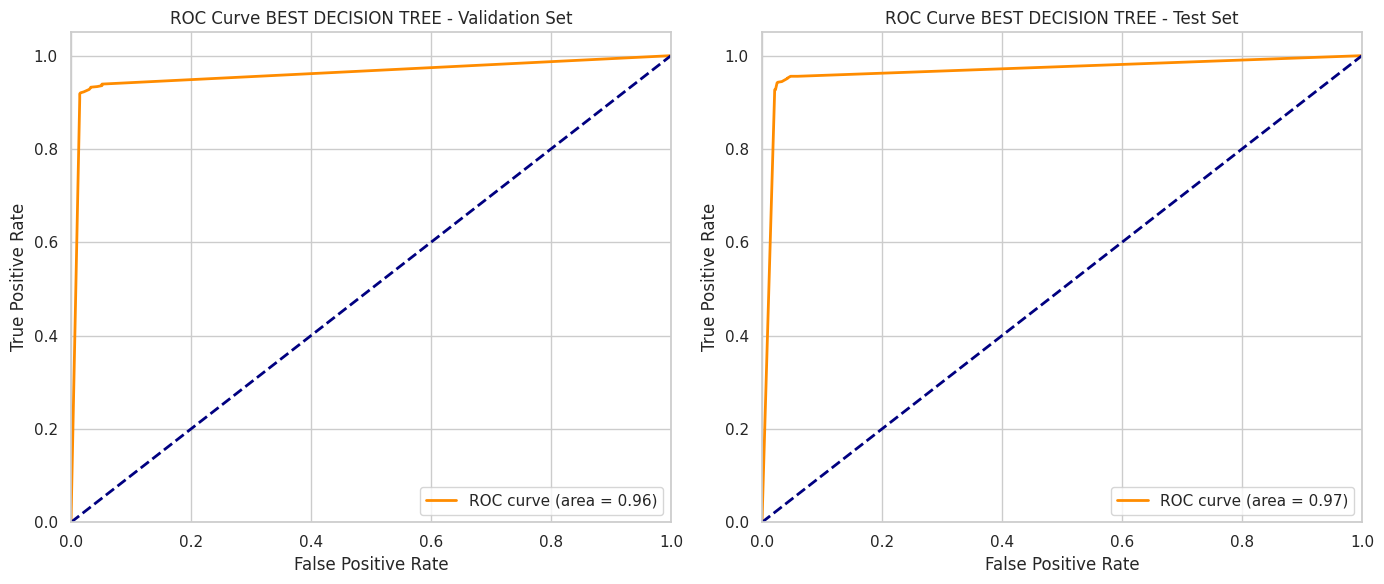

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}

# Configurar o RandomizedSearchCV
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions_dt, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de treino
random_search_dt.fit(train_features, train_target)

# Melhor modelo encontrado
best_dt = random_search_dt.best_estimator_

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(random_search_dt.best_params_)

# Prever os resultados com o melhor modelo no conjunto de validação
val_predictions_dt_best = best_dt.predict(val_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de validação
print("Classification Report - Best Decision Tree (Validation Set):")
print(classification_report(val_target, val_predictions_dt_best))

# Prever as probabilidades no conjunto de validação
val_proba_dt = best_dt.predict_proba(val_features_scaled)[:, 1]
val_fpr_dt, val_tpr_dt, _ = roc_curve(val_target, val_proba_dt)
val_roc_auc_dt = auc(val_fpr_dt, val_tpr_dt)

# Prever os resultados com o melhor modelo no conjunto de teste
test_predictions_dt_best = best_dt.predict(test_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de teste
print("\nClassification Report - Best Decision Tree (Test Set):")
print(classification_report(test_target, test_predictions_dt_best))

# Prever as probabilidades no conjunto de teste
test_proba_dt = best_dt.predict_proba(test_features_scaled)[:, 1]
test_fpr_dt, test_tpr_dt, _ = roc_curve(test_target, test_proba_dt)
test_roc_auc_dt = auc(test_fpr_dt, test_tpr_dt)

# Plotar as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr_dt, val_tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST DECISION TREE - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr_dt, test_tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST DECISION TREE - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 4. SVM (Support Vector Machine)

##### Baseline

In [ ]:
from sklearn.svm import SVC

svm_baseline = SVC(probability=True, random_state=42)

# Usar cross-validation para treinar e validar o modelo
cv_scores_svm = cross_val_score(svm_baseline, train_features, train_target, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_svm}")
print(f"Mean cross-validation score: {np.mean(cv_scores_svm)}")

# Ajustar o modelo aos dados de treino completos
svm_baseline.fit(train_features, train_target)

# Prever os resultados no conjunto de validação
val_predictions_svm_baseline = svm_baseline.predict(val_features_scaled)

# Prever os resultados no conjunto de teste
test_predictions_svm_baseline = svm_baseline.predict(test_features_scaled)

# Imprimir o classification report da versão baseline
print("\nClassification Report [Validação] - Baseline SVM:")
print(classification_report(val_target, val_predictions_svm_baseline))
print("Classification Report [Teste] - Baseline SVM:")
print(classification_report(test_target, test_predictions_svm_baseline))

Cross-validation scores: [0.96757164 0.9690566  0.96528302 0.96150943 0.97207547]
Mean cross-validation score: 0.9670992344688238

Classification Report [Validação] - Baseline SVM:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       756
           1       0.97      0.98      0.98      1494

    accuracy                           0.97      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.97      0.97      0.97      2250

Classification Report [Teste] - Baseline SVM:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       756
           1       0.97      0.99      0.98      1494

    accuracy                           0.98      2250
   macro avg       0.98      0.97      0.97      2250
weighted avg       0.98      0.98      0.98      2250



##### Otimizado com Randomized Search

Melhores parâmetros encontrados:
{'kernel': 'rbf', 'gamma': 1.0, 'C': 100.0}
Classification Report - Best SVM (Validation Set):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       756
           1       0.98      0.99      0.99      1494

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250


Classification Report - Best SVM (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       756
           1       0.98      0.99      0.99      1494

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250



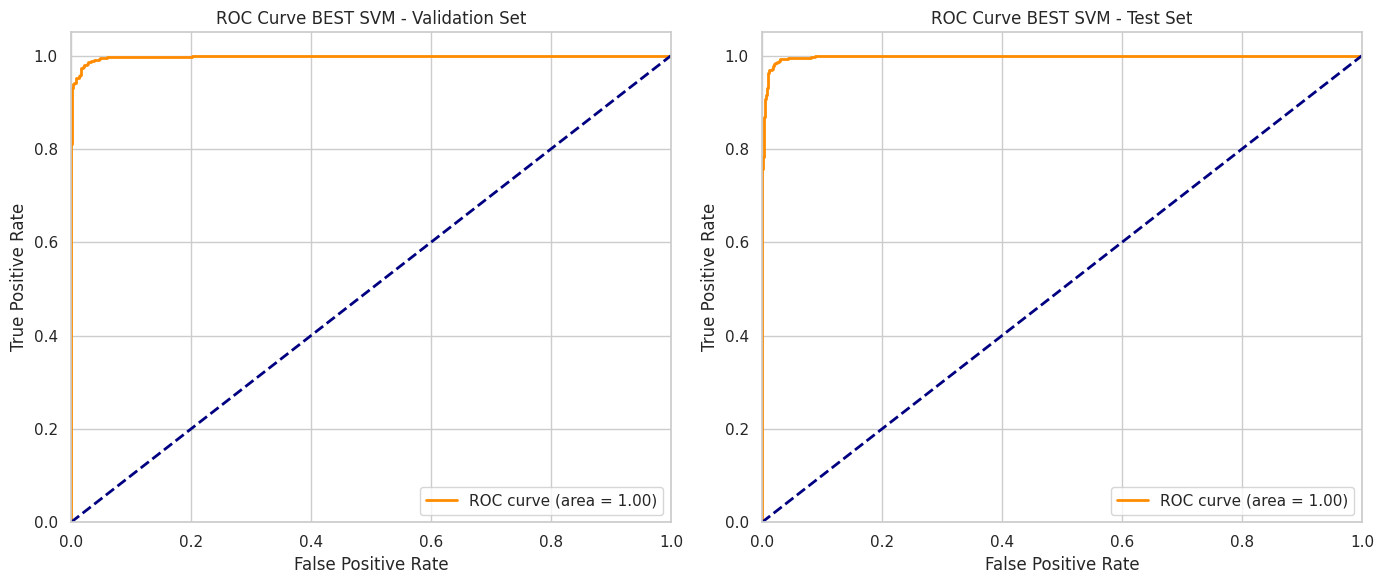

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions_svm = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'gamma': np.logspace(-3, 3, 7),  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']
}

# Configurar o RandomizedSearchCV
random_search_svm = RandomizedSearchCV(SVC(probability=True, random_state=42), param_distributions_svm, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de treino
random_search_svm.fit(train_features, train_target)

# Melhor modelo encontrado
best_svm = random_search_svm.best_estimator_

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(random_search_svm.best_params_)

# Prever os resultados com o melhor modelo no conjunto de validação
val_predictions_svm_best = best_svm.predict(val_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de validação
print("Classification Report - Best SVM (Validation Set):")
print(classification_report(val_target, val_predictions_svm_best))

# Prever as probabilidades no conjunto de validação
val_proba_svm = best_svm.predict_proba(val_features_scaled)[:, 1]
val_fpr_svm, val_tpr_svm, _ = roc_curve(val_target, val_proba_svm)
val_roc_auc_svm = auc(val_fpr_svm, val_tpr_svm)

# Prever os resultados com o melhor modelo no conjunto de teste
test_predictions_svm_best = best_svm.predict(test_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de teste
print("\nClassification Report - Best SVM (Test Set):")
print(classification_report(test_target, test_predictions_svm_best))

# Prever as probabilidades no conjunto de teste
test_proba_svm = best_svm.predict_proba(test_features_scaled)[:, 1]
test_fpr_svm, test_tpr_svm, _ = roc_curve(test_target, test_proba_svm)
test_roc_auc_svm = auc(test_fpr_svm, test_tpr_svm)

# Plotar as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr_svm, val_tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST SVM - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr_svm, test_tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST SVM - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

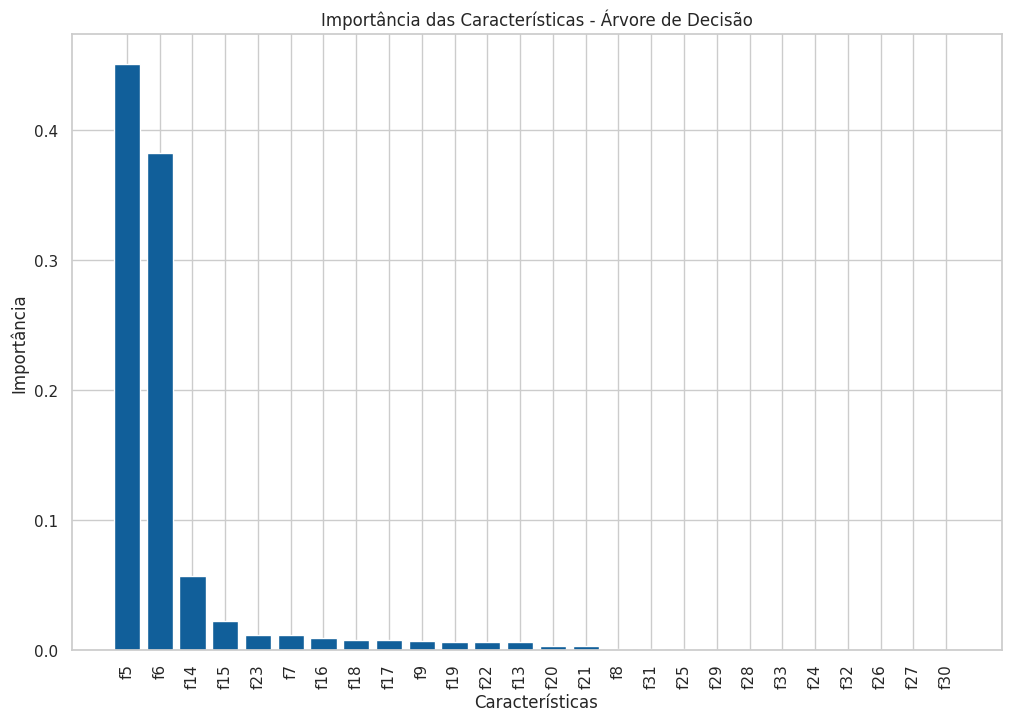

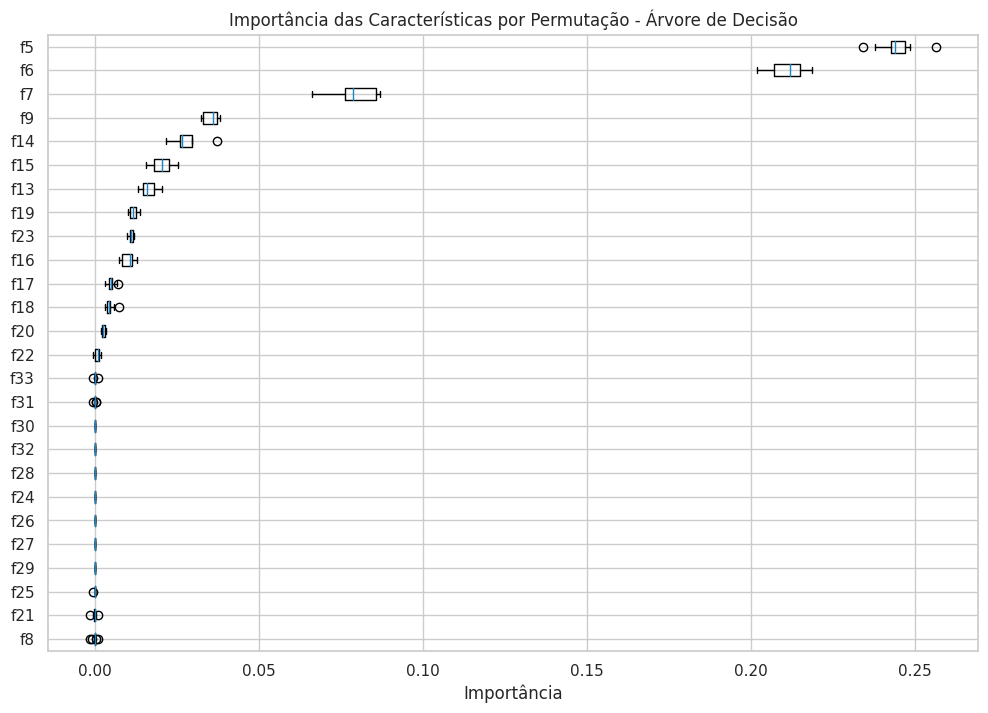

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Inicializar e ajustar o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(train_features, train_target)

# Obter a importância das características da Árvore de Decisão
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotar a importância das características
plt.figure(figsize=(12, 8))
plt.title("Importância das Características - Árvore de Decisão")
plt.bar(range(train_features.shape[1]), importances[indices], align="center")
plt.xticks(range(train_features.shape[1]), train_features.columns[indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importância")
plt.show()

# Avaliação da importância das características usando permutação
# Verifique se `val_features_scaled` é um DataFrame com os nomes das colunas
if isinstance(val_features_scaled, np.ndarray):
    # Converter para DataFrame se necessário
    val_features_scaled = pd.DataFrame(val_features_scaled, columns=train_features.columns)

perm_importance = permutation_importance(decision_tree, val_features_scaled, val_target, n_repeats=10, random_state=42)

# Plotar a importância das características usando permutação
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=val_features_scaled.columns[sorted_idx])
plt.title("Importância das Características por Permutação - Árvore de Decisão")
plt.xlabel("Importância")
plt.show()

#### 5. Random Forest

##### Baseline

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline = RandomForestClassifier(random_state=42)

# Usar cross-validation para treinar e validar o modelo
cv_scores_rf = cross_val_score(rf_baseline, train_features, train_target, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_rf}")
print(f"Mean cross-validation score: {np.mean(cv_scores_rf)}")

# Ajustar o modelo aos dados de treino completos
rf_baseline.fit(train_features, train_target)

# Prever os resultados no conjunto de validação
val_predictions_rf_baseline = rf_baseline.predict(val_features_scaled)

# Prever os resultados no conjunto de teste
test_predictions_rf_baseline = rf_baseline.predict(test_features_scaled)

# Imprimir o classification report da versão baseline
print("\nClassification Report [Validação] - Baseline Random Forest:")
print(classification_report(val_target, val_predictions_rf_baseline))
print("Classification Report [Teste] - Baseline Random Forest:")
print(classification_report(test_target, test_predictions_rf_baseline))

Cross-validation scores: [0.97662142 0.97509434 0.97886792 0.98339623 0.98566038]
Mean cross-validation score: 0.9799280571444834

Classification Report [Validação] - Baseline Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       756
           1       0.99      0.87      0.93      1494

    accuracy                           0.91      2250
   macro avg       0.89      0.92      0.90      2250
weighted avg       0.92      0.91      0.91      2250

Classification Report [Teste] - Baseline Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       756
           1       0.99      0.89      0.93      1494

    accuracy                           0.92      2250
   macro avg       0.90      0.93      0.91      2250
weighted avg       0.93      0.92      0.92      2250



##### Otimizado com Randomized Search

Melhores parâmetros encontrados:
{'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 18}
Classification Report - Best Random Forest (Validation Set):
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       756
           1       0.98      0.87      0.92      1494

    accuracy                           0.90      2250
   macro avg       0.89      0.92      0.90      2250
weighted avg       0.92      0.90      0.91      2250


Classification Report - Best Random Forest (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       756
           1       0.99      0.90      0.94      1494

    accuracy                           0.92      2250
   macro avg       0.91      0.94      0.92      2250
weighted avg       0.93      0.92      0.92      2250



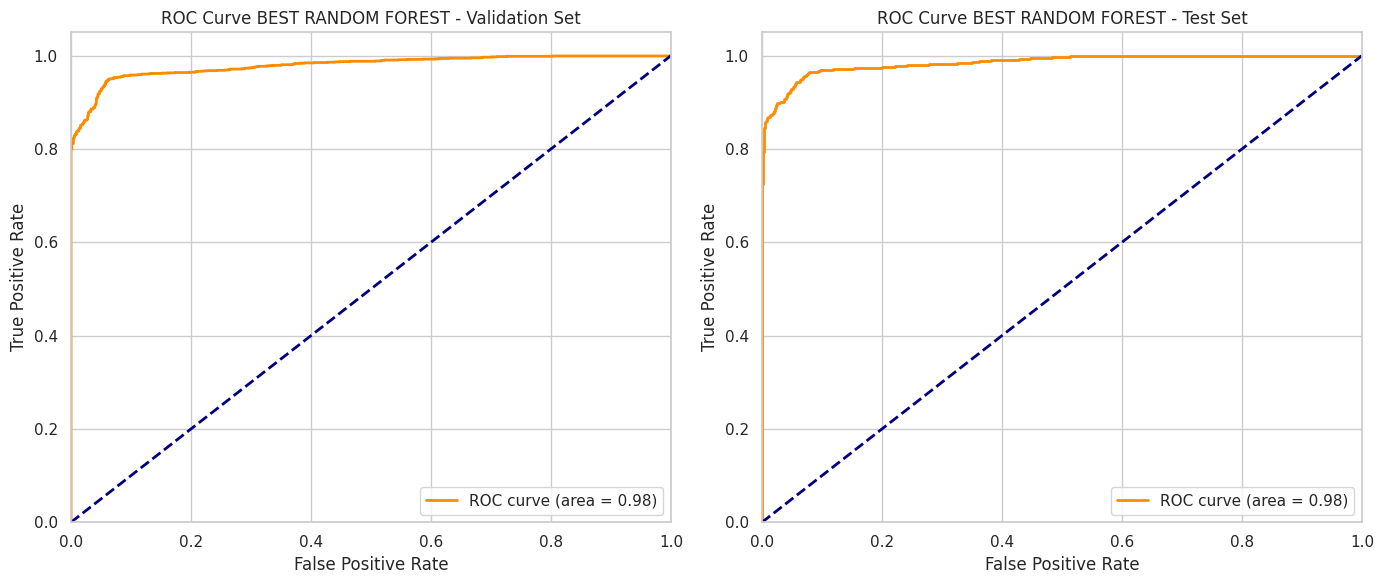

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions_rf = {
    'n_estimators': np.arange(50, 201, 50),  # Número de árvores na floresta
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de features a serem consideradas para a melhor divisão
    'max_depth': np.arange(3, 20),  # Profundidade máxima da árvore
    'min_samples_split': np.arange(2, 20),  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': np.arange(1, 20)  # Número mínimo de amostras necessárias para estar em um nó folha
}

# Configurar o RandomizedSearchCV
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions_rf, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de treino
random_search_rf.fit(train_features, train_target)

# Melhor modelo encontrado
best_rf = random_search_rf.best_estimator_

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(random_search_rf.best_params_)

# Prever os resultados com o melhor modelo no conjunto de validação
val_predictions_rf_best = best_rf.predict(val_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de validação
print("Classification Report - Best Random Forest (Validation Set):")
print(classification_report(val_target, val_predictions_rf_best))

# Prever as probabilidades no conjunto de validação
val_proba_rf = best_rf.predict_proba(val_features_scaled)[:, 1]
val_fpr_rf, val_tpr_rf, _ = roc_curve(val_target, val_proba_rf)
val_roc_auc_rf = auc(val_fpr_rf, val_tpr_rf)

# Prever os resultados com o melhor modelo no conjunto de teste
test_predictions_rf_best = best_rf.predict(test_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de teste
print("\nClassification Report - Best Random Forest (Test Set):")
print(classification_report(test_target, test_predictions_rf_best))

# Prever as probabilidades no conjunto de teste
test_proba_rf = best_rf.predict_proba(test_features_scaled)[:, 1]
test_fpr_rf, test_tpr_rf, _ = roc_curve(test_target, test_proba_rf)
test_roc_auc_rf = auc(test_fpr_rf, test_tpr_rf)

# Plotar as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr_rf, val_tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST RANDOM FOREST - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr_rf, test_tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST RANDOM FOREST - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 6. Rede Neural MLP (Multi-Layer Perceptron)

##### Baseline

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_baseline = MLPClassifier(random_state=42)

# Usar cross-validation para treinar e validar o modelo
cv_scores_mlp = cross_val_score(mlp_baseline, train_features, train_target, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_mlp}")
print(f"Mean cross-validation score: {np.mean(cv_scores_mlp)}")

# Ajustar o modelo aos dados de treino completos
mlp_baseline.fit(train_features, train_target)

# Prever os resultados no conjunto de validação
val_predictions_mlp_baseline = mlp_baseline.predict(val_features_scaled)

# Prever os resultados no conjunto de teste
test_predictions_mlp_baseline = mlp_baseline.predict(test_features_scaled)

# Imprimir o classification report da versão baseline
print("\nClassification Report [Validação] - Baseline MLP:")
print(classification_report(val_target, val_predictions_mlp_baseline))
print("Classification Report [Teste] - Baseline MLP:")
print(classification_report(test_target, test_predictions_mlp_baseline))

Cross-validation scores: [0.97737557 0.98867925 0.98113208 0.98339623 0.98566038]
Mean cross-validation score: 0.9832486980278323

Classification Report [Validação] - Baseline MLP:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       756
           1       1.00      0.87      0.93      1494

    accuracy                           0.91      2250
   macro avg       0.90      0.93      0.91      2250
weighted avg       0.93      0.91      0.91      2250

Classification Report [Teste] - Baseline MLP:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       756
           1       0.99      0.89      0.94      1494

    accuracy                           0.92      2250
   macro avg       0.90      0.94      0.91      2250
weighted avg       0.93      0.92      0.92      2250



##### Otimizado com Randomized Search

Melhores parâmetros encontrados:
{'solver': 'lbfgs', 'learning_rate_init': 9.999999999999999e-06, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 1.0, 'activation': 'relu'}
Classification Report - Best MLP (Validation Set):
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       756
           1       0.99      0.91      0.95      1494

    accuracy                           0.94      2250
   macro avg       0.92      0.95      0.93      2250
weighted avg       0.94      0.94      0.94      2250


Classification Report - Best MLP (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       756
           1       0.99      0.92      0.95      1494

    accuracy                           0.94      2250
   macro avg       0.93      0.95      0.94      2250
weighted avg       0.95      0.94      0.94      2250



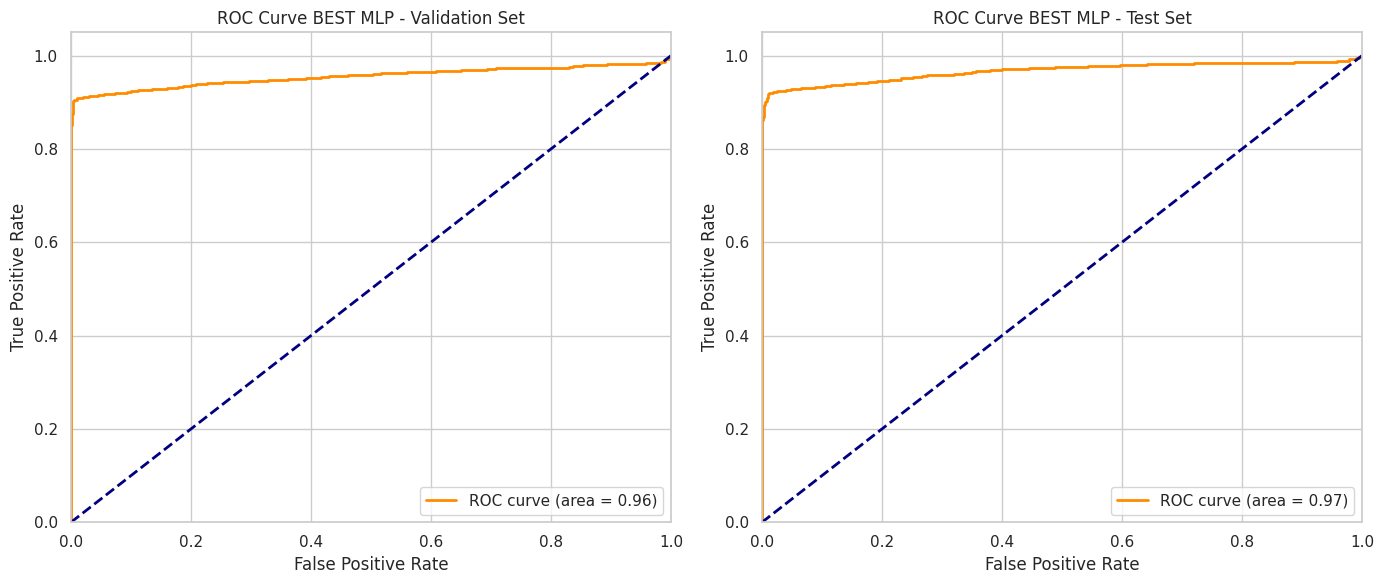

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50), (100, 100), (100, 50, 25)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': np.logspace(-5, 5, 11),  # Regularização L2
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': np.logspace(-5, 0, 6)  # Taxa de aprendizado inicial
}

# Configurar o RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions_mlp, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de treino
random_search_mlp.fit(train_features, train_target)

# Melhor modelo encontrado
best_mlp = random_search_mlp.best_estimator_

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(random_search_mlp.best_params_)

# Prever os resultados com o melhor modelo no conjunto de validação
val_predictions_mlp_best = best_mlp.predict(val_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de validação
print("Classification Report - Best MLP (Validation Set):")
print(classification_report(val_target, val_predictions_mlp_best))

# Prever as probabilidades no conjunto de validação
val_proba_mlp = best_mlp.predict_proba(val_features_scaled)[:, 1]
val_fpr_mlp, val_tpr_mlp, _ = roc_curve(val_target, val_proba_mlp)
val_roc_auc_mlp = auc(val_fpr_mlp, val_tpr_mlp)

# Prever os resultados com o melhor modelo no conjunto de teste
test_predictions_mlp_best = best_mlp.predict(test_features_scaled)

# Imprimir o classification report do melhor modelo no conjunto de teste
print("\nClassification Report - Best MLP (Test Set):")
print(classification_report(test_target, test_predictions_mlp_best))

# Prever as probabilidades no conjunto de teste
test_proba_mlp = best_mlp.predict_proba(test_features_scaled)[:, 1]
test_fpr_mlp, test_tpr_mlp, _ = roc_curve(test_target, test_proba_mlp)
test_roc_auc_mlp = auc(test_fpr_mlp, test_tpr_mlp)

# Plotar as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr_mlp, val_tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST MLP - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr_mlp, test_tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST MLP - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 7. Comitê de Redes Neurais Artificiais

##### Baseline

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict

# Criar diferentes configurações de redes neurais
mlp1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(50, 25), activation='tanh', solver='adam', random_state=42)
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', solver='sgd', random_state=42)

# Criar o comitê de redes neurais
committee_baseline = VotingClassifier(estimators=[('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting='soft')

# Usar cross-validation para treinar e validar o modelo
cv_scores_committee = cross_val_score(committee_baseline, train_features, train_target, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_committee}")
print(f"Mean cross-validation score: {np.mean(cv_scores_committee)}")

# Ajustar o modelo aos dados de treino completos
committee_baseline.fit(train_features, train_target)

# Prever os resultados no conjunto de validação
val_predictions_committee_baseline = committee_baseline.predict(val_features_scaled)

# Prever os resultados no conjunto de teste
test_predictions_committee_baseline = committee_baseline.predict(test_features_scaled)

# Imprimir o classification report da versão baseline
print("\nClassification Report [Validação] - Baseline Neural Network Committee:")
print(classification_report(val_target, val_predictions_committee_baseline))
print("Classification Report [Teste] - Baseline Neural Network Committee:")
print(classification_report(test_target, test_predictions_committee_baseline))

Cross-validation scores: [0.98642534 0.98943396 0.98716981 0.98490566 0.99018868]
Mean cross-validation score: 0.9876246905148125

Classification Report [Validação] - Baseline Neural Network Committee:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       756
           1       1.00      0.88      0.93      1494

    accuracy                           0.92      2250
   macro avg       0.90      0.94      0.91      2250
weighted avg       0.93      0.92      0.92      2250

Classification Report [Teste] - Baseline Neural Network Committee:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90       756
           1       0.99      0.89      0.94      1494

    accuracy                           0.92      2250
   macro avg       0.91      0.94      0.92      2250
weighted avg       0.93      0.92      0.92      2250



##### Otimizado com Randomized Search

Melhores Parâmetros para MLP1: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 9.999999999999999e-05, 'activation': 'relu'}
Melhores Parâmetros para MLP2: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 9.999999999999999e-05, 'activation': 'relu'}
Melhores Parâmetros para MLP3: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 9.999999999999999e-05, 'activation': 'relu'}
Classification Report - Best Neural Network Committee (Validation Set):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       756
           1       0.98      0.98      0.98      1494

    accuracy                           0.98      2250
   macro avg       0.97      0.98      0.97      2250
weighted avg       0.98      0.98      0.98      2250


Classification Report - Best Neural Network Committee (Test Set):
              precision    recall  f1-score  

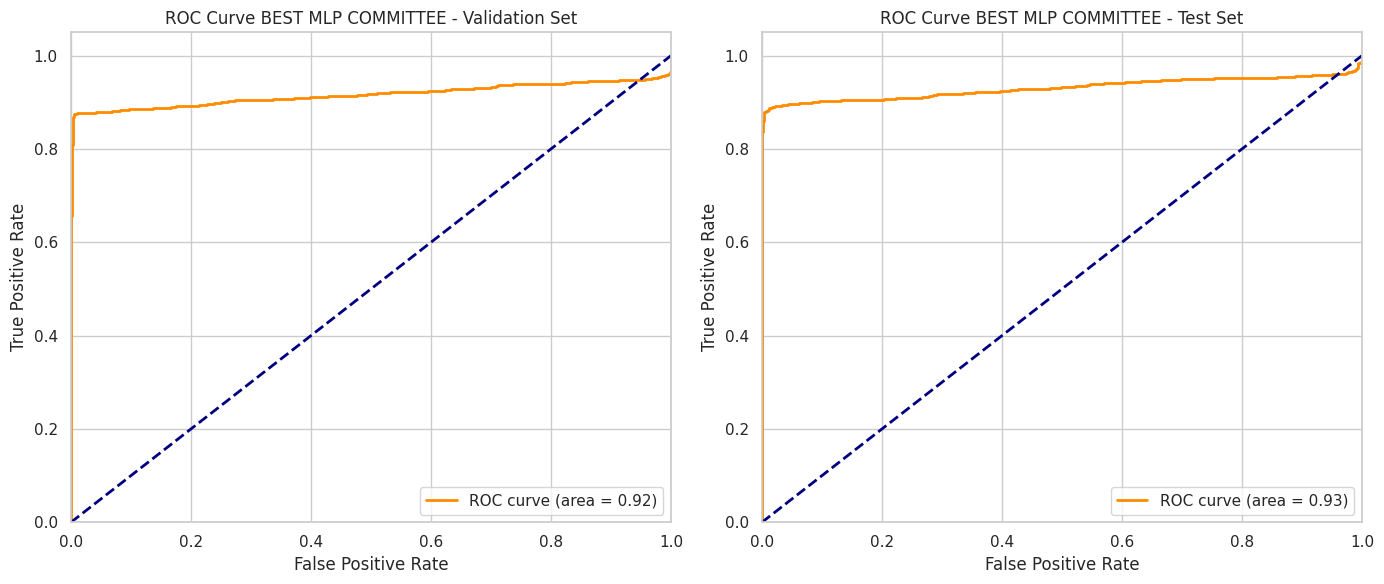

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Definir a grade de parâmetros para o RandomizedSearchCV para cada rede neural
param_distributions_mlp1 = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-5, 0, 6),
    'learning_rate': ['constant', 'adaptive']
}

param_distributions_mlp2 = param_distributions_mlp1
param_distributions_mlp3 = param_distributions_mlp1

# Configurar o RandomizedSearchCV para cada rede neural
random_search_mlp1 = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions_mlp1, n_iter=30, cv=5, random_state=42, n_jobs=-1)
random_search_mlp2 = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions_mlp2, n_iter=30, cv=5, random_state=42, n_jobs=-1)
random_search_mlp3 = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions_mlp3, n_iter=30, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de validação
random_search_mlp1.fit(val_features_scaled, val_target)
random_search_mlp2.fit(val_features_scaled, val_target)
random_search_mlp3.fit(val_features_scaled, val_target)

# Melhor modelo encontrado para cada rede neural
best_mlp1 = random_search_mlp1.best_estimator_
best_mlp2 = random_search_mlp2.best_estimator_
best_mlp3 = random_search_mlp3.best_estimator_

# Imprimir os melhores parâmetros encontrados para cada rede neural
print("Melhores Parâmetros para MLP1:", random_search_mlp1.best_params_)
print("Melhores Parâmetros para MLP2:", random_search_mlp2.best_params_)
print("Melhores Parâmetros para MLP3:", random_search_mlp3.best_params_)

# Criar o comitê otimizado de redes neurais
committee_best = VotingClassifier(estimators=[('mlp1', best_mlp1), ('mlp2', best_mlp2), ('mlp3', best_mlp3)], voting='soft')

# Ajustar o comitê no conjunto de treinamento
committee_best.fit(train_features, train_target)

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_committee_best = cross_val_predict(committee_best, val_features_scaled, val_target, cv=5)

# Prever os resultados com o comitê no conjunto de teste
test_predictions_committee_best = committee_best.predict(test_features_scaled)

# Imprimir o classification report do comitê no conjunto de validação
print("Classification Report - Best Neural Network Committee (Validation Set):")
print(classification_report(val_target, val_predictions_committee_best))

# Imprimir o classification report do comitê no conjunto de teste
print("\nClassification Report - Best Neural Network Committee (Test Set):")
print(classification_report(test_target, test_predictions_committee_best))

# Prever as probabilidades no conjunto de validação
val_proba_committee = committee_best.predict_proba(val_features_scaled)[:, 1]
val_fpr_committee, val_tpr_committee, _ = roc_curve(val_target, val_proba_committee)
val_roc_auc_committee = auc(val_fpr_committee, val_tpr_committee)

# Prever as probabilidades no conjunto de teste
test_proba_committee = committee_best.predict_proba(test_features_scaled)[:, 1]
test_fpr_committee, test_tpr_committee, _ = roc_curve(test_target, test_proba_committee)
test_roc_auc_committee = auc(test_fpr_committee, test_tpr_committee)

# Plotar as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr_committee, val_tpr_committee, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc_committee:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST MLP COMMITTEE - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr_committee, test_tpr_committee, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_committee:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST MLP COMMITTEE - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 8. Comitê Heterogêneo

##### Baseline

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict

# Criar os modelos
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
mlp = MLPClassifier(random_state=42)

# Criar o comitê heterogêneo
heterogeneous_committee_baseline = VotingClassifier(
    estimators=[('dt', dt), ('rf', rf), ('svm', svm), ('mlp', mlp)],
    voting='soft'
)

# Usar cross-validation para treinar e validar o modelo
cv_scores_heterogeneous_committee = cross_val_score(heterogeneous_committee_baseline, train_features, train_target, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_heterogeneous_committee}")
print(f"Mean cross-validation score: {np.mean(cv_scores_heterogeneous_committee)}")

# Ajustar o modelo aos dados de treino completos
heterogeneous_committee_baseline.fit(train_features, train_target)

# Prever os resultados no conjunto de validação
val_predictions_heterogeneous_committee_baseline = heterogeneous_committee_baseline.predict(val_features_scaled)

# Prever os resultados no conjunto de teste
test_predictions_heterogeneous_committee_baseline = heterogeneous_committee_baseline.predict(test_features_scaled)

# Imprimir o classification report da versão baseline
print("\nClassification Report [Validação] - Baseline Heterogeneous Committee:")
print(classification_report(val_target, val_predictions_heterogeneous_committee_baseline))
print("Classification Report [Teste] - Baseline Heterogeneous Committee:")
print(classification_report(test_target, test_predictions_heterogeneous_committee_baseline))

Cross-validation scores: [0.97812971 0.97811321 0.98113208 0.98188679 0.98415094]
Mean cross-validation score: 0.9806825464583511

Classification Report [Validação] - Baseline Heterogeneous Committee:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       756
           1       0.99      0.95      0.97      1494

    accuracy                           0.96      2250
   macro avg       0.95      0.97      0.96      2250
weighted avg       0.96      0.96      0.96      2250

Classification Report [Teste] - Baseline Heterogeneous Committee:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       756
           1       0.99      0.96      0.97      1494

    accuracy                           0.97      2250
   macro avg       0.96      0.97      0.96      2250
weighted avg       0.97      0.97      0.97      2250



##### Otimizado com Randomized Search

Melhores Parâmetros para Decision Tree:
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}

Melhores Parâmetros para Random Forest:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}

Melhores Parâmetros para Support Vector Machine:
{'kernel': 'rbf', 'gamma': 'scale', 'C': 100}

Melhores Parâmetros para MLP:
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}
Classification Report - Best Heterogeneous Committee (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       756
           1       0.99      0.95      0.97      1494

    accuracy                           0.96      2250
   macro avg       0.95      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250


Classification Report - Best Heterogeneous Committee (Test Set):
              p

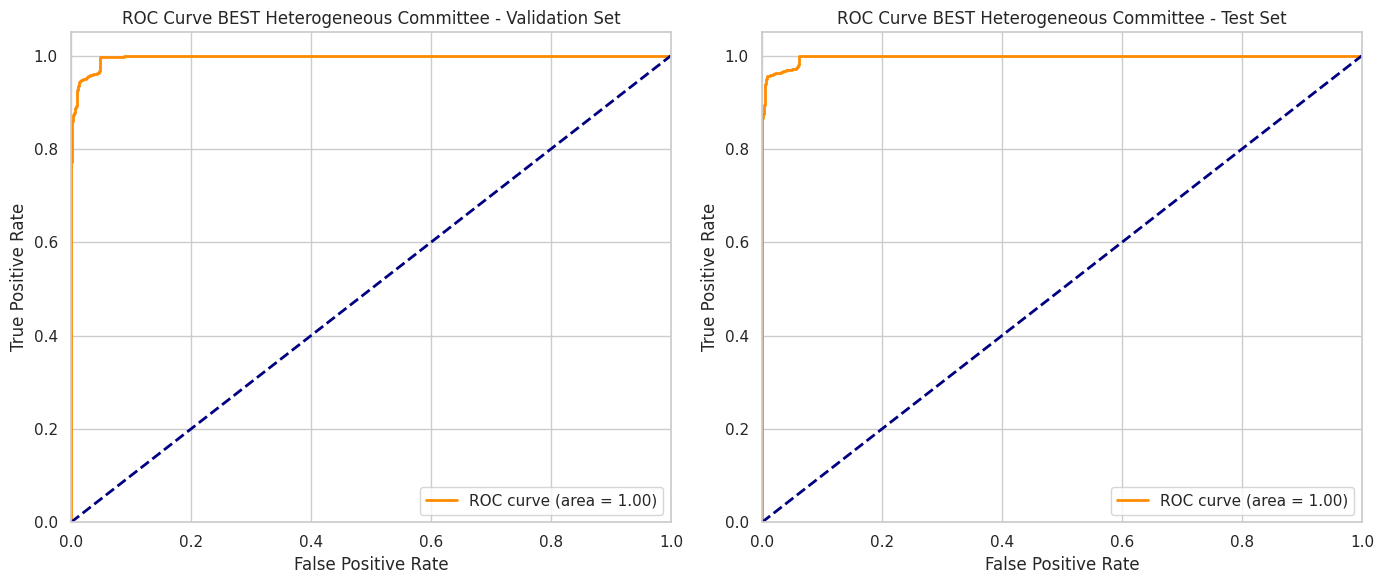

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Definir a grade de parâmetros para cada classificador
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-5, 0, 6),
    'learning_rate': ['constant', 'adaptive']
}

# Configurar RandomizedSearchCV para cada classificador
random_search_dt_committee = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_dt,
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search_rf_committee = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search_svm_committee = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    param_distributions=param_dist_svm,
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search_mlp_committee = RandomizedSearchCV(
    MLPClassifier(random_state=42),
    param_distributions=param_dist_mlp,
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Ajustar RandomizedSearchCV para cada classificador
random_search_dt_committee.fit(train_features, train_target)
random_search_rf_committee.fit(train_features, train_target)
random_search_svm_committee.fit(train_features, train_target)
random_search_mlp_committee.fit(train_features, train_target)

# Obter os melhores modelos
best_dt_committee = random_search_dt_committee.best_estimator_
best_rf_committee = random_search_rf_committee.best_estimator_
best_svm_committee = random_search_svm_committee.best_estimator_
best_mlp_committee = random_search_mlp_committee.best_estimator_

# Imprimir os melhores parâmetros encontrados
print("Melhores Parâmetros para Decision Tree:")
print(random_search_dt_committee.best_params_)
print("\nMelhores Parâmetros para Random Forest:")
print(random_search_rf_committee.best_params_)
print("\nMelhores Parâmetros para Support Vector Machine:")
print(random_search_svm_committee.best_params_)
print("\nMelhores Parâmetros para MLP:")
print(random_search_mlp_committee.best_params_)

# Criar o comitê heterogêneo otimizado
heterogeneous_committee_best = VotingClassifier(
    estimators=[('dt', best_dt_committee), ('rf', best_rf_committee), ('svm', best_svm_committee), ('mlp', best_mlp_committee)],
    voting='soft'
)

# Ajustar o comitê heterogêneo otimizado no conjunto de treino
heterogeneous_committee_best.fit(train_features, train_target)

# Usar o comitê ajustado para prever os resultados no conjunto de validação
val_predictions_heterogeneous_best = heterogeneous_committee_best.predict(val_features_scaled)

# Usar o comitê ajustado para prever os resultados no conjunto de teste
test_predictions_heterogeneous_best = heterogeneous_committee_best.predict(test_features_scaled)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best Heterogeneous Committee (Validation Set):")
print(classification_report(val_target, val_predictions_heterogeneous_best))

print("\nClassification Report - Best Heterogeneous Committee (Test Set):")
print(classification_report(test_target, test_predictions_heterogeneous_best))

# Prever as probabilidades no conjunto de validação
val_proba_committee_best = heterogeneous_committee_best.predict_proba(val_features_scaled)[:, 1]
val_fpr_committee_best, val_tpr_committee_best, _ = roc_curve(val_target, val_proba_committee_best)
val_roc_auc_committee_best = auc(val_fpr_committee_best, val_tpr_committee_best)

# Prever as probabilidades no conjunto de teste
test_proba_committee_best = heterogeneous_committee_best.predict_proba(test_features_scaled)[:, 1]
test_fpr_committee_best, test_tpr_committee_best, _ = roc_curve(test_target, test_proba_committee_best)
test_roc_auc_committee_best = auc(test_fpr_committee_best, test_tpr_committee_best)

# Plotar as curvas ROC lado a lado
plt.figure(figsize=(14, 6))

# Curva ROC para o conjunto de validação
plt.subplot(1, 2, 1)
plt.plot(val_fpr_committee_best, val_tpr_committee_best, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc_committee_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST Heterogeneous Committee - Validation Set')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 2)
plt.plot(test_fpr_committee_best, test_tpr_committee_best, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_committee_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve BEST Heterogeneous Committee - Test Set')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

### Gráficos

##Comparações

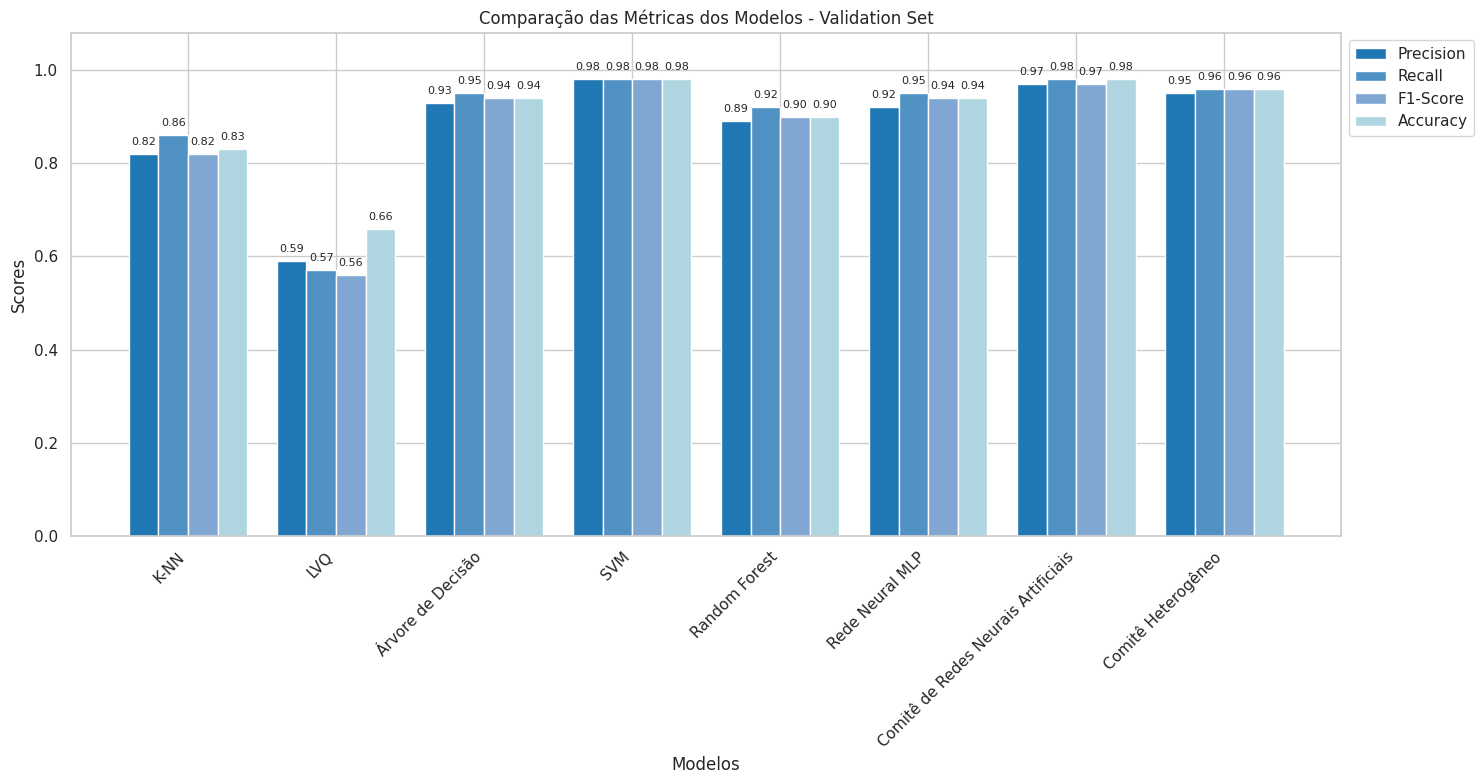

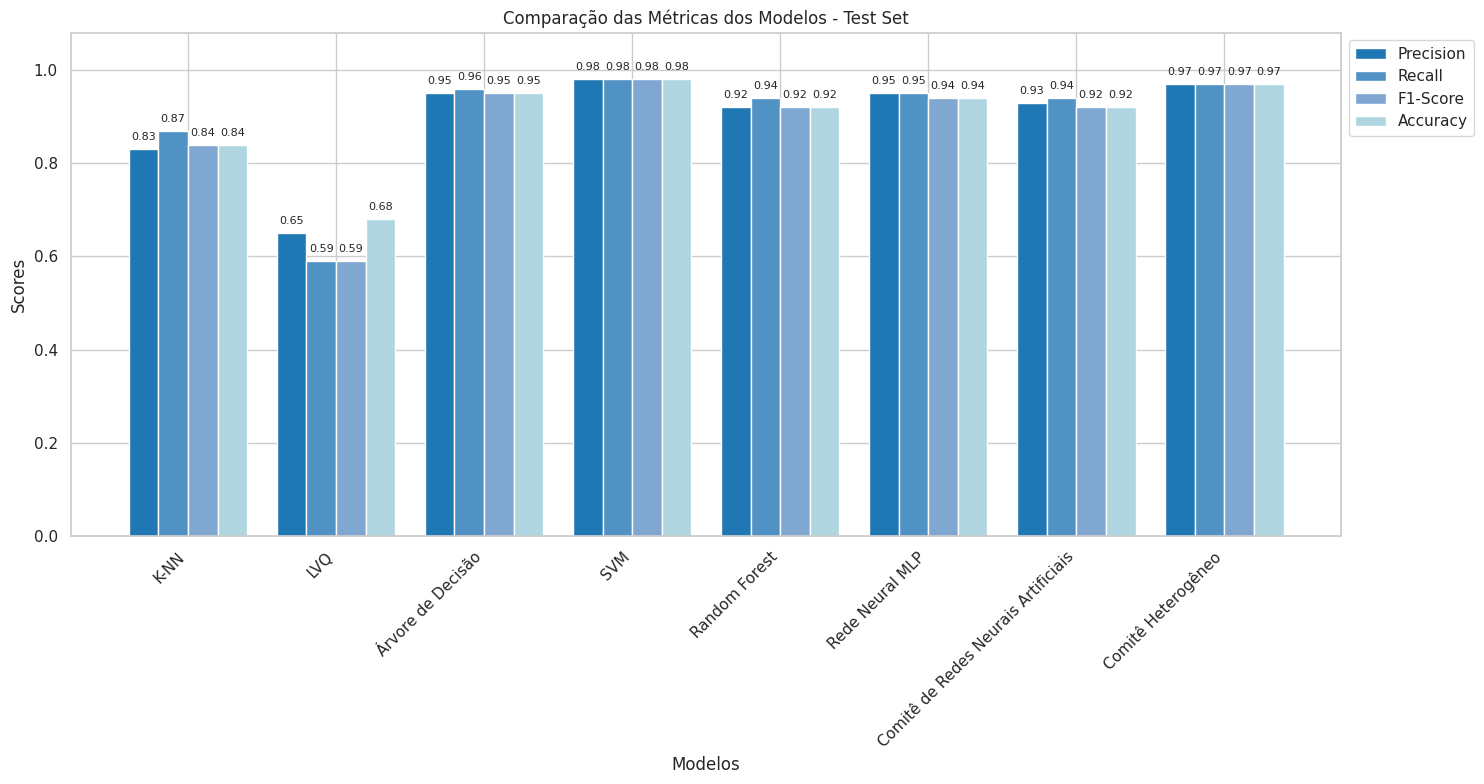

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = [
    'K-NN',
    'LVQ',
    'Árvore de Decisão',
    'SVM',
    'Random Forest',
    'Rede Neural MLP',
    'Comitê de Redes Neurais Artificiais',
    'Comitê Heterogêneo'
]

# Dados para Validation Set
validation_accuracy = [0.83, 0.66, 0.94, 0.98, 0.90, 0.94, 0.98, 0.96]
validation_recall = [0.86, 0.57, 0.95, 0.98, 0.92, 0.95, 0.98, 0.96]
validation_precision = [0.82, 0.59, 0.93, 0.98, 0.89, 0.92, 0.97, 0.95]
validation_f1_score = [0.82, 0.56, 0.94, 0.98, 0.90, 0.94, 0.97, 0.96]

# Dados para Test Set
test_accuracy = [0.84, 0.68, 0.95, 0.98, 0.92, 0.94, 0.92, 0.97]
test_recall = [0.87, 0.59, 0.96, 0.98, 0.94, 0.95, 0.94, 0.97]
test_precision = [0.83, 0.65, 0.95, 0.98, 0.92, 0.95, 0.93, 0.97]
test_f1_score = [0.84, 0.59, 0.95, 0.98, 0.92, 0.94, 0.92, 0.97]

# Função para criar o gráfico
def create_comparison_plot(accuracy, recall, precision, f1_score, title, filename):
    x = np.arange(len(models))
    width = 0.2

    fig, ax = plt.subplots(figsize=(15, 8))

    rects1 = ax.bar(x - 1.5 * width, precision, width, label='Precision', color='#1f77b4')
    rects2 = ax.bar(x - 0.5 * width, recall, width, label='Recall', color='#4f92c3')
    rects3 = ax.bar(x + 0.5 * width, f1_score, width, label='F1-Score', color='#7fa7d1')
    rects4 = ax.bar(x + 1.5 * width, accuracy, width, label='Accuracy', color='#afd6e0')

    ax.set_xlabel('Modelos')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    ax.set_ylim(0, max(max(accuracy), max(recall), max(precision), max(f1_score)) + 0.1)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()
    fig.savefig(filename)
    plt.show()

# Criar gráficos
create_comparison_plot(validation_accuracy, validation_recall, validation_precision, validation_f1_score,
                       'Comparação das Métricas dos Modelos - Validation Set', 'validation_metrics.png')

create_comparison_plot(test_accuracy, test_recall, test_precision, test_f1_score,
                       'Comparação das Métricas dos Modelos - Test Set', 'test_metrics.png')

Comparação curva ROC - Validação e teste

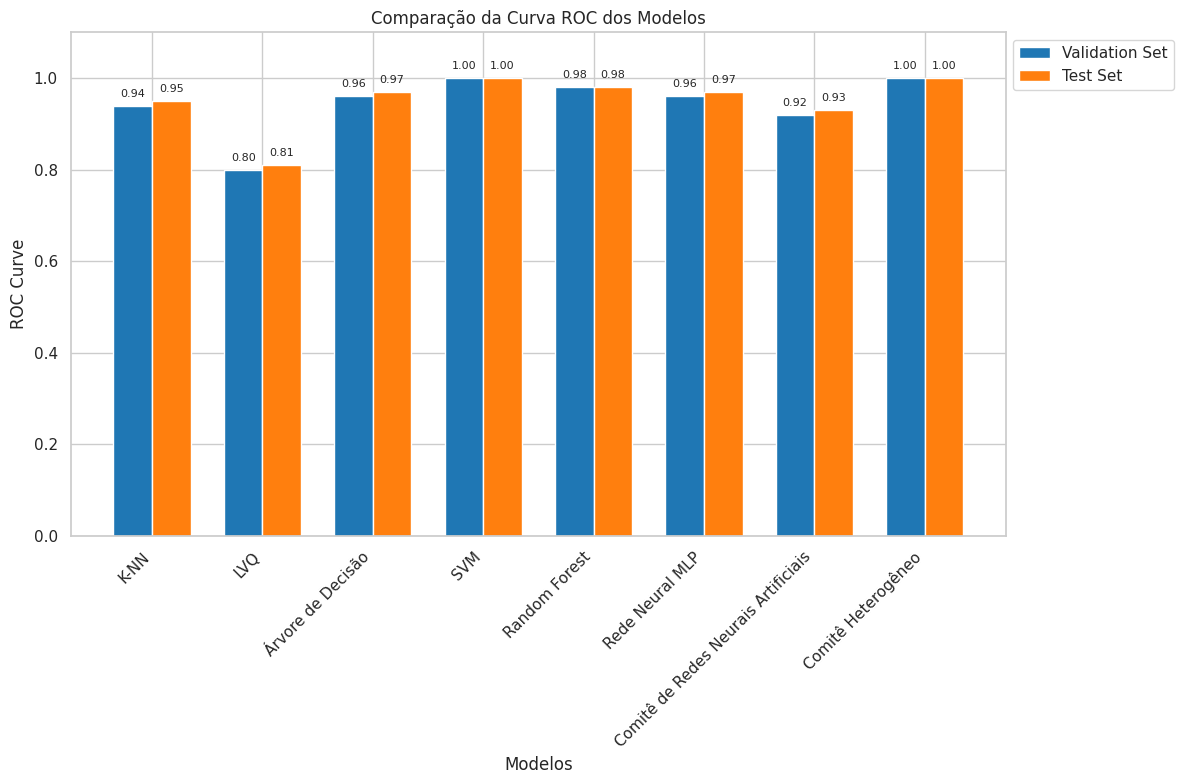

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = [
    'K-NN',
    'LVQ',
    'Árvore de Decisão',
    'SVM',
    'Random Forest',
    'Rede Neural MLP',
    'Comitê de Redes Neurais Artificiais',
    'Comitê Heterogêneo'
]

# Dados para ROC Curve
validation_roc_curve = [0.94, 0.80, 0.96, 1.00, 0.98, 0.96, 0.92, 1.00]
test_roc_curve = [0.95, 0.81, 0.97, 1.00, 0.98, 0.97, 0.93, 1.00]

# Função para criar o gráfico de barras da ROC Curve
def create_roc_curve_plot(validation_roc_curve, test_roc_curve, title, filename):
    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 8))

    rects1 = ax.bar(x - width/2, validation_roc_curve, width, label='Validation Set', color='#1f77b4')
    rects2 = ax.bar(x + width/2, test_roc_curve, width, label='Test Set', color='#ff7f0e')

    ax.set_xlabel('Modelos')
    ax.set_ylabel('ROC Curve')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    ax.set_ylim(0, 1.1)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    fig.savefig(filename)
    plt.show()

# Criar gráfico
create_roc_curve_plot(validation_roc_curve, test_roc_curve,
                      'Comparação da Curva ROC dos Modelos', 'roc_curve_comparison.png')


### Validação

**Precisão**

| Modelo                        | Precisão |
|-------------------------------|----------|
| K-NN                          | 0.82     |
| LVQ                           | 0.59     |
| Decision Tree                 | 0.93     |
| SVM                           | **0.98** |
| Random Forest                 | 0.89     |
| MLP                           | 0.95     |
| MLP Comitê                    | 0.97     |
| Comitê Heterogêneo            | **0.95** |


**Recall**

| Modelo                        | Recall |
|-------------------------------|--------|
| K-NN                          | 0.86   |
| LVQ                           | 0.57   |
| Decision Tree                 | 0.95   |
| SVM                           | **0.98** |
| Random Forest                 | 0.92   |
| MLP                           | 0.95   |
| MLP Comitê                    | 0.98   |
| Comitê Heterogêneo            | **0.96** |

**F1-Score**

| Modelo                        | F1-Score |
|-------------------------------|----------|
| K-NN                          | 0.82     |
| LVQ                           | 0.56     |
| Decision Tree                 | 0.94     |
| SVM                           | **0.98** |
| Random Forest                 | 0.90     |
| MLP                           | 0.94     |
| MLP Comitê                    | 0.97     |
| Comitê Heterogêneo            | **0.96** |

**Acurácia**

| Modelo                        | Acurácia |
|-------------------------------|----------|
| K-NN                          | 0.83     |
| LVQ                           | 0.66     |
| Decision Tree                 | 0.94     |
| SVM                           | **0.98** |
| Random Forest                 | 0.90     |
| MLP                           | 0.94     |
| MLP Comitê                    | **0.98** |
| Comitê Heterogêneo            | 0.96     |

**Curva ROC**

| Modelo                        | ROC Curve |
|-------------------------------|-----------|
| K-NN                          | 0.94      |
| LVQ                           | 0.80      |
| Decision Tree                 | 0.96      |
| SVM                           | **1.00**      |
| Random Forest                 | 0.98      |
| MLP                           | 0.96      |
| MLP Comitê                    | 0.92      |
| Comitê Heterogêneo            | **1.00**      |


### Teste

**Precisão**

| Modelo                        | Precisão |
|-------------------------------|----------|
| K-NN                          | 0.83     |
| LVQ                           | 0.65     |
| Decision Tree                 | 0.95     |
| SVM                           | **0.98** |
| Random Forest                 | 0.92     |
| MLP                           | 0.95     |
| MLP Comitê                    | 0.93     |
| Comitê Heterogêneo            | **0.97** |


**Recall**

| Modelo                        | Recall |
|-------------------------------|--------|
| K-NN                          | 0.87   |
| LVQ                           | 0.59   |
| Decision Tree                 | 0.96   |
| SVM                           | **0.98** |
| Random Forest                 | 0.94   |
| MLP                           | 0.95   |
| MLP Comitê                    | 0.94   |
| Comitê Heterogêneo            | **0.97** |


**F1-Score**

| Modelo                        | F1-Score |
|-------------------------------|----------|
| K-NN                          | 0.84     |
| LVQ                           | 0.59     |
| Decision Tree                 | 0.95     |
| SVM                           | **0.98** |
| Random Forest                 | 0.92     |
| MLP                           | 0.94     |
| MLP Comitê                    | 0.92     |
| Comitê Heterogêneo            | **0.97** |


**Acurácia**

| Modelo                        | Acurácia |
|-------------------------------|----------|
| K-NN                          | 0.84     |
| LVQ                           | 0.68     |
| Decision Tree                 | 0.95     |
| SVM                           | **0.98** |
| Random Forest                 | 0.92     |
| MLP                           | 0.94     |
| MLP Comitê                    | 0.92     |
| Comitê Heterogêneo            | **0.97** |


**Curva ROC**

| Modelo                        | ROC Curve |
|-------------------------------|-----------|
| K-NN                          | 0.95      |
| LVQ                           | 0.81      |
| Decision Tree                 | 0.97      |
| SVM                           | **1.00**      |
| Random Forest                 | 0.98      |
| MLP                           | 0.97      |
| MLP Comitê                    | 0.93      |
| Comitê Heterogêneo            | **1.00**      |

### Teste estatístico e comparação de Janez Demsar

In [ ]:
!pip install scikit_posthocs

In [ ]:
cleaned_val_df_scaled = pd.DataFrame(val_features_scaled, columns=val_features.columns)

In [ ]:
cleaned_val_df_scaled.head()

,f5,f6,f7,f8,f9,f13,f14,f15,f16,f17,...,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33
0,0.526627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.485714,0.882353,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.124260,0.873418,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.159763,0.341772,0.096154,0.153846,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.058824,0.3125,0.0,0.0,0.0,0.0,0.0,0.0
3,0.437870,0.506329,0.653846,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.867647,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.2,0.0,0.0
4,0.136095,0.291139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Classificadores
classifiers = [best_knn, best_lvq, best_dt, best_svm, best_rf, best_mlp, committee_best, heterogeneous_committee_best]

# Número de folds
num_folds = 5

# Inicializa o objeto KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lista dos f1_scores
f1_scores = np.zeros((num_folds, len(classifiers)))

# Separa o dataset de validação em folds e avalia o f1_score para cada fold, para cada modelo
for fold, (train_index, test_index) in enumerate(kf.split(cleaned_val_df_scaled)):
    X_test_fold, y_test_fold = cleaned_val_df_scaled.iloc[test_index], val_target.iloc[test_index]

    for idx, clf in enumerate(classifiers):
        y_pred = clf.predict(X_test_fold)
        f1 = f1_score(y_test_fold, y_pred, average='weighted')
        f1_scores[fold, idx] = f1

In [ ]:
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman

stat, p = friedmanchisquare(*f1_scores.T)
print(f"Friedman test statistic: {stat}, p-value: {p}")

if p < 0.05:
  nemenyi_results = posthoc_nemenyi_friedman(f1_scores)
  print("Nemenyi test results:\n", nemenyi_results)
else:
  print("No significant differences found with Friedman test.")

Friedman test statistic: 34.73333333333332, p-value: 1.2551676069943271e-05
Nemenyi test results:
           0         1         2         3         4         5         6  \
0  1.000000  0.900000  0.216068  0.002718  0.900000  0.440155  0.900000   
1  0.900000  1.000000  0.040951  0.001000  0.900000  0.119451  0.521692   
2  0.216068  0.040951  1.000000  0.830427  0.598878  0.900000  0.900000   
3  0.002718  0.001000  0.830427  1.000000  0.027405  0.598878  0.162484   
4  0.900000  0.900000  0.598878  0.027405  1.000000  0.830427  0.900000   
5  0.440155  0.119451  0.900000  0.598878  0.830427  1.000000  0.900000   
6  0.900000  0.521692  0.900000  0.162484  0.900000  0.900000  1.000000   
7  0.027405  0.002718  0.900000  0.900000  0.162484  0.900000  0.521692   

          7  
0  0.027405  
1  0.002718  
2  0.900000  
3  0.900000  
4  0.162484  
5  0.900000  
6  0.521692  
7  1.000000  
